# kNN分类算法分析-kNN回归

In [1]:
import mglearn
import matplotlib.pyplot as plt


In [2]:
import numpy as np

def distance(p1, p2):
    """返回两点间的距离(欧几里得距离, Euclidean distance)
       这个定义具有普遍性,可用于计算N维空间中的两点的距离.
    """
    return np.sqrt(np.sum(np.power(p1 - p2, 2)))

In [3]:
import random 

def majority_vote(votes):
    count_dict ={}
    
    for vote in votes:
        # 已见过的选项(vote)
        if vote in count_dict:
            count_dict[vote] += 1
        # 未见过的选项
        else:
            count_dict[vote] = 1
            
    winners = []       
    max_count = max(count_dict.values())
    for vote, counts in count_dict.items():
        if counts == max_count:
            winners.append(vote)
    return random.choice(winners)
# 定义一个序列
votes = [1,2,1,3,4,2,2,2,3,3,2,3,3]
majority_vote(votes)

3

In [4]:
import numpy as np
import scipy.stats as ss # 导入scipy.stats(约定)

def majority_vote_simple(votes):
    """
    返回序列中的最高频元素.
    输入:NumPy数组
    """
    mode, count = ss.mstats.mode(votes)
    return mode

votes = [1,2,1,1,2,3,1,5,6,3]
votes = np.array(votes)
majority_vote_simple(votes)

array([1.])

现在,我们可以写出求k个最近邻居的函数: find_nn(p,points,k)

最近的3个点的索引:
[1 4 0]
最近的3个点的坐标:
[[-1  0]
 [ 0  0]
 [-1 -1]]


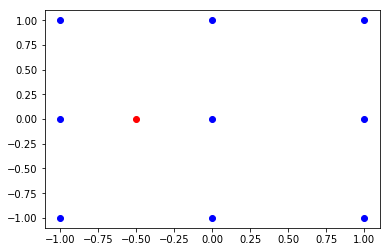

In [5]:
def find_nn(p,points, k=3):
    """
    返回(points集合中)距离p点最近的k个点的索引值.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(points[i],p)
    ind = np.argsort(distances)
    # 计算出距离值(由小到大排序):
    #return ind[0:k]
    return ind[:k]  

k = 3
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]) 
p = np.array([-.5, 0])
ind = find_nn(p,points,k)
print("最近的{}个点的索引:\n{}".format(len(ind),ind))
print("最近的{}个点的坐标:\n{}".format(len(ind),points[ind]))

#作图
plt.plot(points[:,0],points[:,1],"bo")
plt.plot(p[0],p[1],"ro")

预言一个新的点的类别(class)

写一个函数实现:预言一个新点的类别. 
    
    找出距离p点最近的k个邻居的索引值;
    选出这些邻居中落在各类的次数("类似词语出现的频率")
    

所属类别: 1


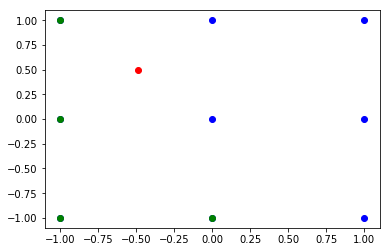

In [6]:
# outcomes为已知点points的类别
def knn_predict(p, points, outcomes, k=3):
    """返回新点p的类别."""
    ind = find_nn(p, points, k)
    #print("ind: ",ind)
    return majority_vote(outcomes[ind])
    
outcomes = np.array([0,0,0,0,1,1,1,1,1])
p = np.array([-.49,.5])
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
res = knn_predict(p, points,outcomes,3)
print("所属类别:",res)

#作图
plt.plot(points[:,0],points[:,1],"bo")
plt.plot(points[:4,0],points[:4,1], "go")
plt.plot(p[0],p[1],"ro")

## 5. 产生数据

end points:
bivariate:
ipstats 模块


In [7]:
def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1.5,1).rvs((n,2))), axis =0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n))) 
    return (points, outcomes)

generate_synth_data(n=2)
    

(array([[ 2.19026429, -0.58038542],
        [-0.03437258, -0.28891604],
        [ 3.16257887,  1.306698  ],
        [ 2.23860426,  2.13361451]]), array([0, 0, 1, 1]))

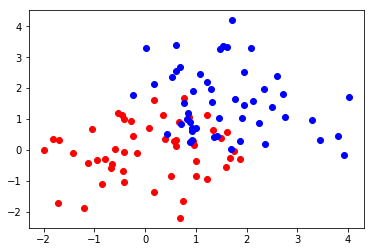

In [8]:
points, outcomes = generate_synth_data(n=50)

plt.figure()
n = 50
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivaradata.pdf")

## 6. 制作预测格点

In [9]:
def make_pred_grid(predictors,outcomes,limits,h,k):
    (x_min,x_max, y_min,y_max) = limits
    xs = np.arange(x_min,x_max,h) # h
    ys = np.arange(y_min,y_max,h)
    xx, yy = np.meshgrid(xs,ys)
    
    pred_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            pred_grid[j,i] = knn_predict(p,predictors,outcomes,k)
            
    return (xx,yy,pred_grid)

## 7. 对格点作图 

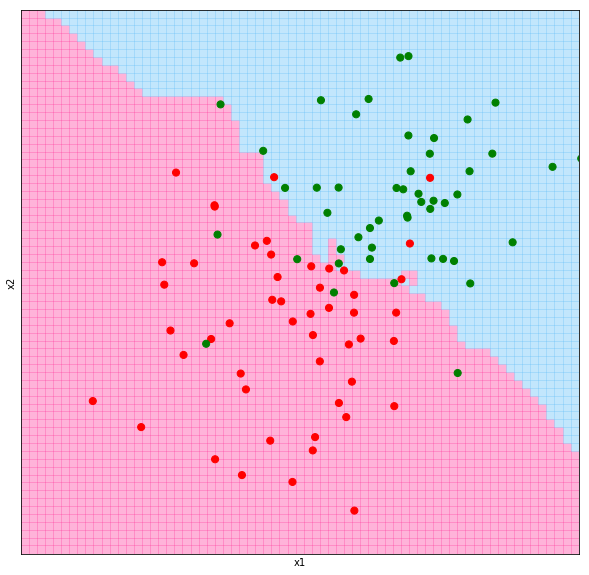

In [10]:
# 可下载
def plot_pred_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","yellowgreen","lightskyblue" ])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    

(predictors, outcomes) = generate_synth_data()

k = 5 ; filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)



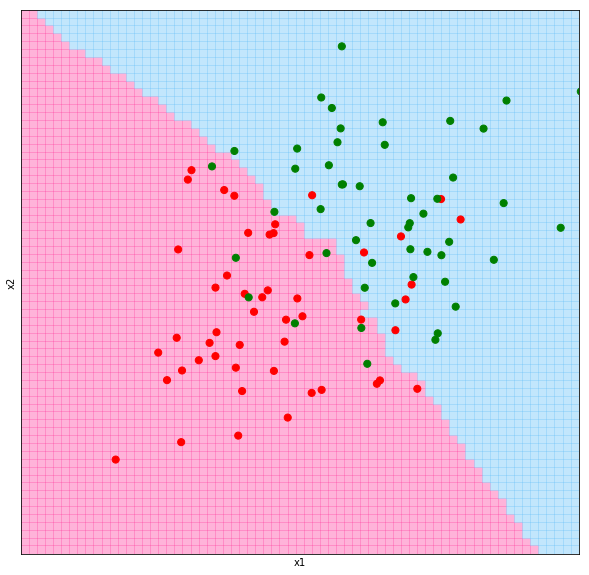

In [11]:
(predictors, outcomes) = generate_synth_data()

k = 21 ; filename = "knn_synth_13.pdf"
limits = (-3,4,-3,4) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)

## 8. Scikit-learn的使用


导入SciKit-Learn的 KNeighbors分类器. 

In [12]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

## 9. 应用kNN模型
    应用我们自己写的kNN分类器到一个真实的数据集. 
    对比我们的kNN分类器和scikit-learn模块的kNN分类器的表现. 
    
数据集: 150朵鸢尾花(Iris):共有三种,每种的数量为50.

对每一朵花,有如下变量(covariates): 

    花萼(sepal)长度, 花萼宽度;
    花瓣(petal)长度, 花瓣宽度.

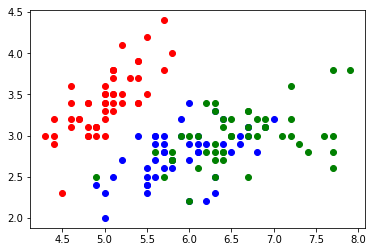

In [13]:
from sklearn import datasets
iris = datasets.load_iris()

#iris
predictors = iris.data[:,0:2]
outcomes = iris.target
#print(outcomes == 0)
#print(predictors[outcomes==0][:,0])
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1] , "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1] , "bo")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1] , "go")
plt.savefig("iris.svg")

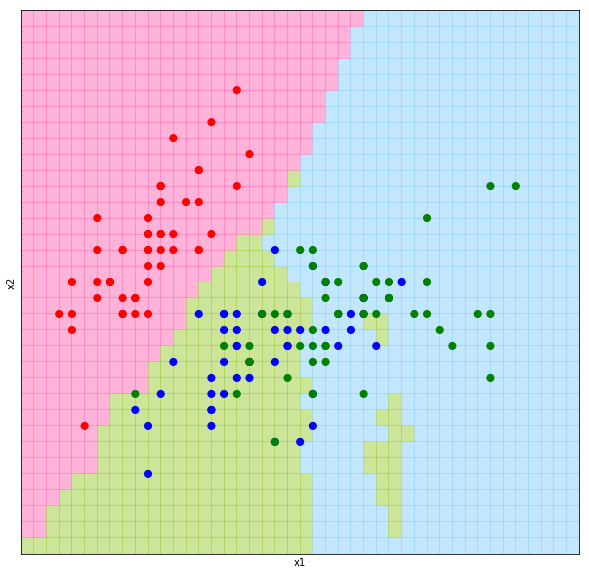

In [28]:
k = 11 ; filename = "iris_grid.pdf";
limits = (4, 8.5, 1.5, 5) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# 建立knn模型
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)
sk_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

In [30]:
sk_predictions.shape

(150,)

In [31]:
my_predictions = np.array([knn_predict(p,predictors,outcomes,k) for p in predictors ])
my_predictions
my_predictions.shape

(150,)

In [32]:
# 判断两种方法的预测结果是否相同
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [33]:
# 两种算法的对比
np.mean(my_predictions == sk_predictions) 


0.8866666666666667

In [34]:
# 计算准确率
np.mean(my_predictions == outcomes)


0.8333333333333334

## 小结:
    1. kNN is particularly useful when no other model fits your data well, 
    因为它是一个不需要参数的分类方法. 例如,你不需要考虑你的数据是线性可分还是线性不可分.
    
    2. 要想用kNN算法,我们的数据必须是可测的(数据集上有距离可以定义出来).